In [1]:
from brian2 import *


prefs.codegen.target = "numpy"

In [29]:
C_m = 20 * pF

g_Naf = 50 * nsiemens
g_Nas = 100 * nsiemens  # variable
g_K = 40 * nsiemens
g_l = 5 * nsiemens

E_Na = 55 * mV
E_K = -85 * mV
E_r = -70 * mV
E_l = -70 * mV


eqs = """
dV/dt = (Iinp - I_Nas - I_Naf - I_K - I_l) / C_m : volt

Iinp : ampere
I_Naf = 0*amp : ampere
I_K = 0*amp : ampere
I_l = g_l * (V - E_l) : ampere

I_Nas = g_Nas * m_Nas**3 * h_Nas * (V - E_Na) : ampere
dm_Nas/dt = alpha_mNas * (1 - m_Nas) - beta_mNas * m_Nas : 1
alpha_mNas = exp(0.039*V/mV - 0.56)/second : 1/second
beta_mNas = exp(-0.049*V/mV - 2.53)/second : 1/second
dh_Nas/dt = alpha_hNas * (1 - h_Nas) - beta_hNas * h_Nas : 1
alpha_hNas = 0.002 * exp(-V/mV/30)/second : Hz
beta_hNas = 0.1/(1 + 0.2*exp(-(V/mV+10)/7))/second : Hz
"""

testnr = NeuronGroup(1, eqs, method='euler')

teststmon = StateMonitor(testnr, 'V', True)

testnr.V = E_l

run(20*ms, report='text')
testnr.V = -50*mV
run(30*ms, report='text')
testnr.Iinp = .1*nA
run(50*ms, report='text')
testnr.Iinp = 1*nA
run(50*ms)

Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=20. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s
Starting simulation at t=50. ms for a duration of 50. ms
50. ms (100%) simulated in < 1s


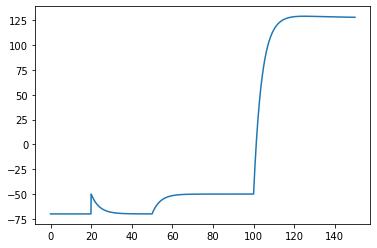

In [30]:
plot(teststmon.t/ms, teststmon.V[0]/mV)

In [ ]:
dh_Nas/dt = alpha_hNas * (1 - h_Nas) - beta_hNas * h_Nas : 1

alpha_mNas = 0.05 * (1 + exp(V/mV + 44)) / (1 + exp((V/mV - 7)/10))/second : 1/second
beta_mNas = 0.05 * (1 + exp(-(V/mV + 6)/16))/second : 1/second

alpha_r = 1e-4 * exp(-(V/mv + 8)/29) + 8e-4 : 1
beta_r = 3e-4 / (1 + 0.24 * exp(-(V/mv + 23)/10)) : 1
    
dh_Naf/dt = alpha_hNaf * (1 - h_Naf) - beta_hNaf * h_Naf : 1
dm_Naf/dt = alpha_mNaf * (1 - m_Naf) - beta_m_Naf * m_Naf : 1
dn/dt = alpha_n * (1 - n) - beta_n * n : 1
dr_Nas/dt = alpha_r * (1 - r_Nas) - beta_r * r_Nas : 1
